In [30]:
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv("Datos_tienda.csv")

In [6]:
df

,Fecha,Productos,Ingreso,Tienda
0,01/01/2019,19,8936,1
1,02/01/2019,43,8765,1
2,03/01/2019,30,8235,1
3,04/01/2019,33,8556,1
4,05/01/2019,23,7511,1
...,...,...,...,...
5475,27/12/2021,15,9806,5
5476,28/12/2021,40,9320,5
5477,29/12/2021,42,5384,5
5478,30/12/2021,24,9925,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha      5480 non-null   object
 1   Productos  5480 non-null   int64 
 2   Ingreso    5480 non-null   int64 
 3   Tienda     5480 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.4+ KB


In [8]:
df.describe()

,Productos,Ingreso,Tienda
count,5480.000000,5480.000000,5480.000000
mean,32.439781,7527.536861,3.000000
std,10.260898,1448.560780,1.414343
min,15.000000,5000.000000,1.000000
25%,24.000000,6254.000000,2.000000
50%,32.000000,7566.000000,3.000000
75%,41.000000,8768.000000,4.000000
max,50.000000,10000.000000,5.000000


In [13]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['año'] = df['Fecha'].dt.year
df['dia'] = df['Fecha'].dt.day_name()
df['mes'] = df['Fecha'].dt.month_name()

In [15]:
df

,Fecha,Productos,Ingreso,Tienda,año,dia,mes
0,2019-01-01,19,8936,1,2019,Tuesday,January
1,2019-01-02,43,8765,1,2019,Wednesday,January
2,2019-01-03,30,8235,1,2019,Thursday,January
3,2019-01-04,33,8556,1,2019,Friday,January
4,2019-01-05,23,7511,1,2019,Saturday,January
...,...,...,...,...,...,...,...
5475,2021-12-27,15,9806,5,2021,Monday,December
5476,2021-12-28,40,9320,5,2021,Tuesday,December
5477,2021-12-29,42,5384,5,2021,Wednesday,December
5478,2021-12-30,24,9925,5,2021,Thursday,December


In [16]:
productos_negativos = (df['Productos'] < 0).any()

productos_negativos


np.False_

In [18]:
ingresos_negativos = (df['Ingreso'] < 0).any()
ingresos_negativos

np.False_

In [22]:
Q1_productos = df['Productos'].quantile(0.25)
Q3_productos = df['Productos'].quantile(0.75)
IQR_productos = Q3_productos - Q1_productos
lower_bound_productos = Q1_productos - 1.5 * IQR_productos
upper_bound_productos = Q3_productos + 1.5 * IQR_productos
outliers_productos = df[(df['Productos'] < lower_bound_productos) | (df['Productos'] > upper_bound_productos)]
outliers_productos

,Fecha,Productos,Ingreso,Tienda,año,dia,mes


In [23]:
Q1_ingresos = df['Ingreso'].quantile(0.25)
Q3_ingresos = df['Ingreso'].quantile(0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos
lower_bound_ingresos = Q1_ingresos - 1.5 * IQR_ingresos
upper_bound_ingresos = Q3_ingresos + 1.5 * IQR_ingresos
outliers_ingresos = df[(df['Ingreso'] < lower_bound_ingresos) | (df['Ingreso'] > upper_bound_ingresos)]
outliers_ingresos

,Fecha,Productos,Ingreso,Tienda,año,dia,mes


In [19]:
df['Tienda'].value_counts()

Tienda
1    1096
2    1096
3    1096
4    1096
5    1096
Name: count, dtype: int64

Comprobación de los datos, no hay nans, no valores extraños como negativos o outliers, poner el formato de fecha correctamente y separar por dia, mes y año para poder trabajar.

# GRAFICAS

In [31]:
productos_por_tienda = df.groupby('Tienda')['Productos'].sum().reset_index()
productos_por_tienda_año = df.groupby(['Tienda', 'año'])['Productos'].sum().reset_index()

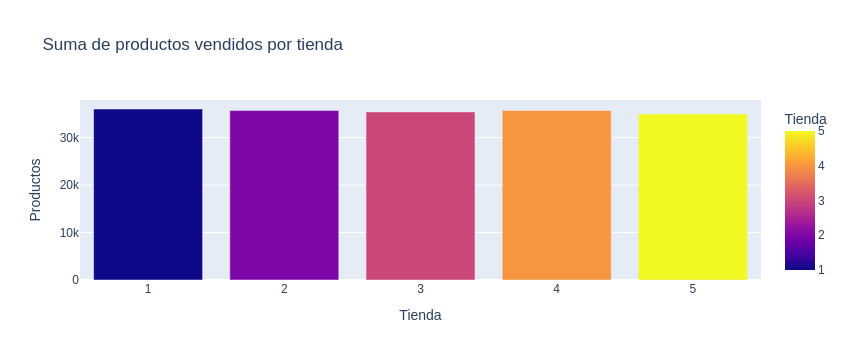

In [35]:
fig1 = px.bar(productos_por_tienda, x='Tienda', y='Productos', color= 'Tienda', title='Suma de productos vendidos por tienda')
fig1.show()

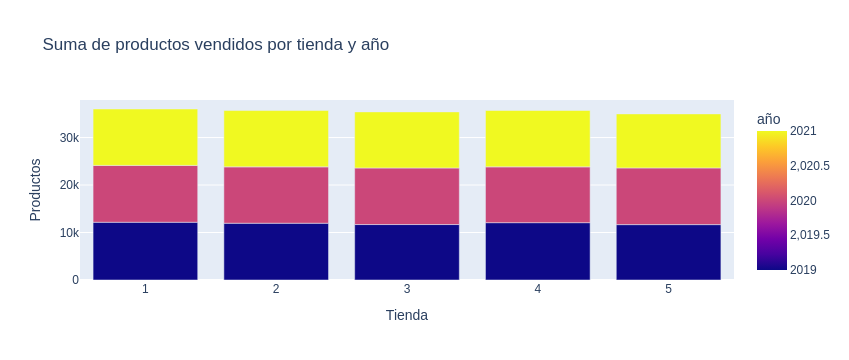

In [34]:
fig2 = px.bar(productos_por_tienda_año, x='Tienda', y='Productos', color='año', title='Suma de productos vendidos por tienda y año')
fig2.show()

In [39]:
ingreso_por_tienda = df.groupby('Tienda')['Ingreso'].sum().reset_index()
ingreso_por_tienda_año = df.groupby(['Tienda', 'año'])['Ingreso'].sum().reset_index()

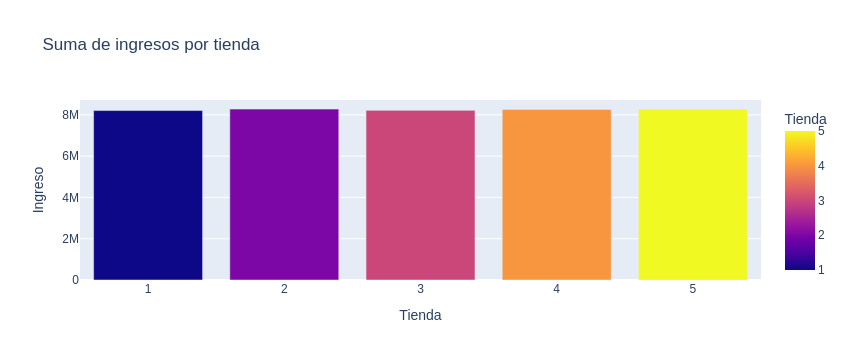

In [40]:
fig3 = px.bar(ingreso_por_tienda, x='Tienda', y='Ingreso', color= 'Tienda', title='Suma de ingresos por tienda')
fig3.show()

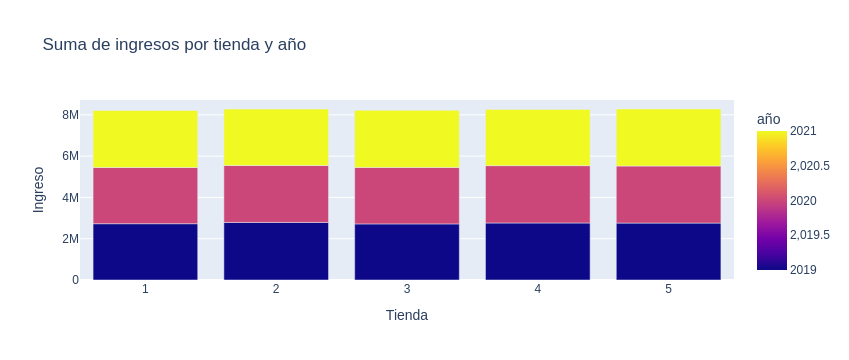

In [41]:
fig4 = px.bar(ingreso_por_tienda_año, x='Tienda', y='Ingreso', color='año', title='Suma de ingresos por tienda y año')
fig4.show()

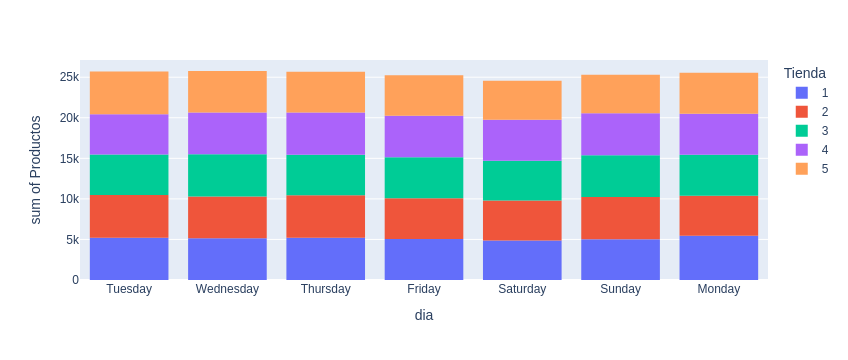

In [48]:
fig5 = px.histogram(data_frame = df,
             x          = "dia",
             y  = "Productos",
            color = 'Tienda')
fig5.show()

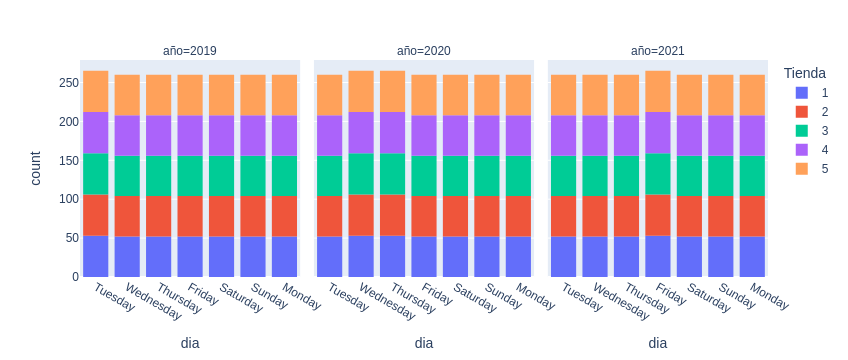

In [49]:
fig6 = px.histogram(data_frame = df,
             x          = "dia",
             hover_data = ["Productos"],
             facet_col      = "año",
             color ='Tienda',
             nbins      = 50)
fig6.show()

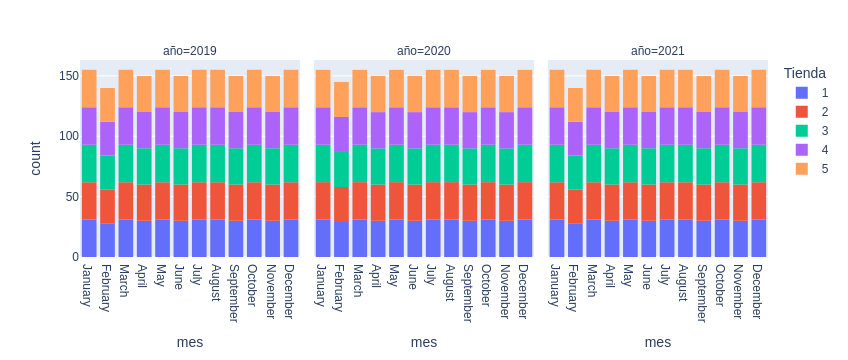

In [50]:
fig7 = px.histogram(data_frame = df,
             x          = "mes",
             hover_data = ["Productos"],
             facet_col      = "año",
             color ='Tienda',
             nbins      = 50)
fig7.show()

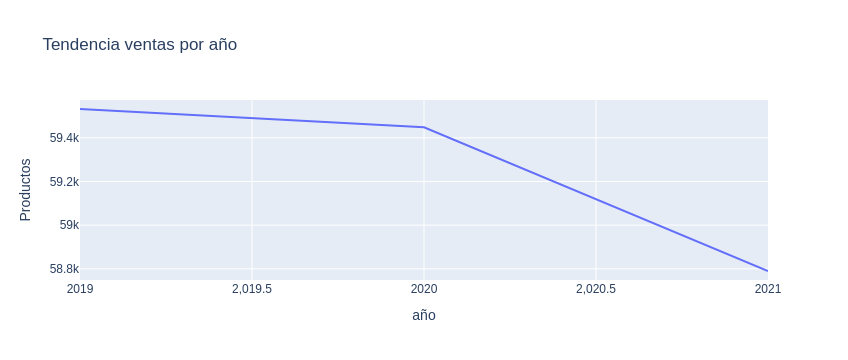

In [63]:
productos_por_año = df.groupby('año')['Productos'].sum().reset_index()
fig8 = px.line(productos_por_año, x='año', y='Productos', title='Tendencia ventas por año')
fig8.show()    